In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')

In [17]:
df = pd.read_csv('matches.csv')
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [18]:
df2 = pd.read_csv('deliveries.csv')
df2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


## EDA

Most Runs in a Calender year

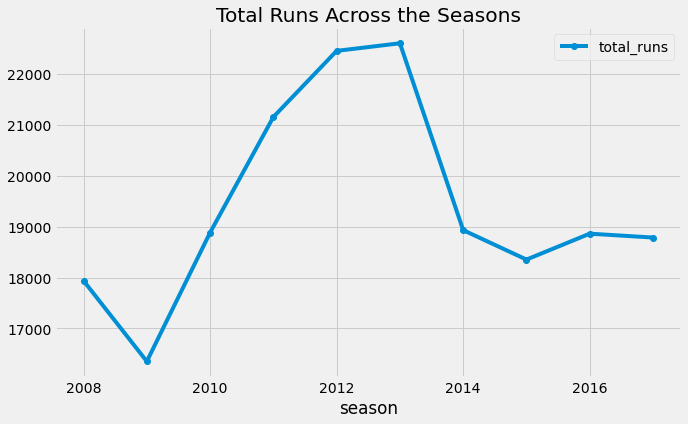

In [21]:
batsmen = df[['id','season']].merge(df2, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
#merging the matches and delivery dataframe by referencing the id and match_id columns respectively
top_runs=batsmen.groupby(['season'])['total_runs'].sum().reset_index()
top_runs.set_index('season').plot(marker='o')
plt.gcf().set_size_inches(10,6)
plt.title('Total Runs Across the Seasons')
plt.show()

Average runs per match in each Season

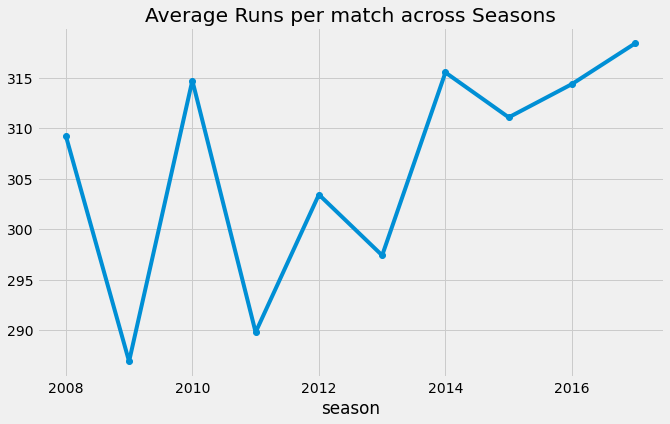

In [24]:
avgruns_each_season=df.groupby(['season']).count().id.reset_index()
avgruns_each_season.rename(columns={'id':'matches'},inplace=1)
avgruns_each_season['total_runs']=top_runs['total_runs']
avgruns_each_season['average_runs_per_match']=avgruns_each_season['total_runs']/avgruns_each_season['matches']
avgruns_each_season.set_index('season')['average_runs_per_match'].plot(marker='o')
plt.gcf().set_size_inches(10,6)
plt.title('Average Runs per match across Seasons')
plt.show()

Impact of Toss Winning

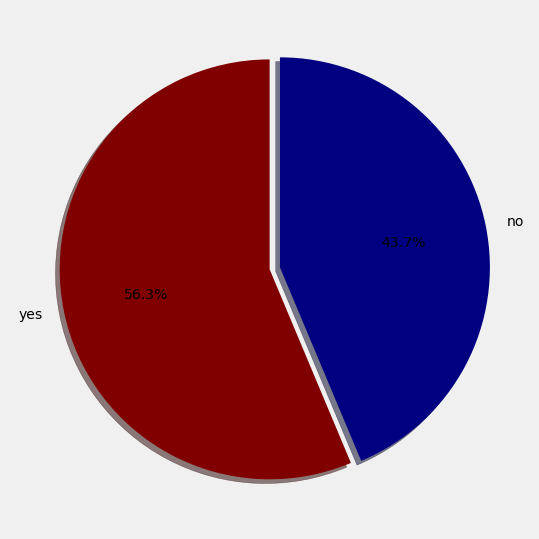

In [51]:
plt.figure(figsize = (16,8))
df_n=df[df['toss_winner']==df['winner']]
slices=[len(df_n),(577-len(df_n))]
labels=['yes','no']
plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0.05),autopct='%1.1f%%' ,colors=['maroon','navy'])
fig = plt.gcf()
fig.set_size_inches(9,9)
plt.show()

Total Matches vs Wins for Teams 

In [31]:
matches_played_byteams=pd.concat([df['team1'],df['team2']])
matches_played_byteams=matches_played_byteams.value_counts().reset_index()
matches_played_byteams.columns=['Team','Total Matches']
matches_played_byteams['wins']=df['winner'].value_counts().reset_index()['winner']
matches_played_byteams.set_index('Team',inplace=True)

trace1 = go.Bar(
    x=matches_played_byteams.index,
    y=matches_played_byteams['Total Matches'],
    name='Total Matches'
)
trace2 = go.Bar(
    x=matches_played_byteams.index,
    y=matches_played_byteams['wins'],
    name='Matches Won'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

Maximum man of the match

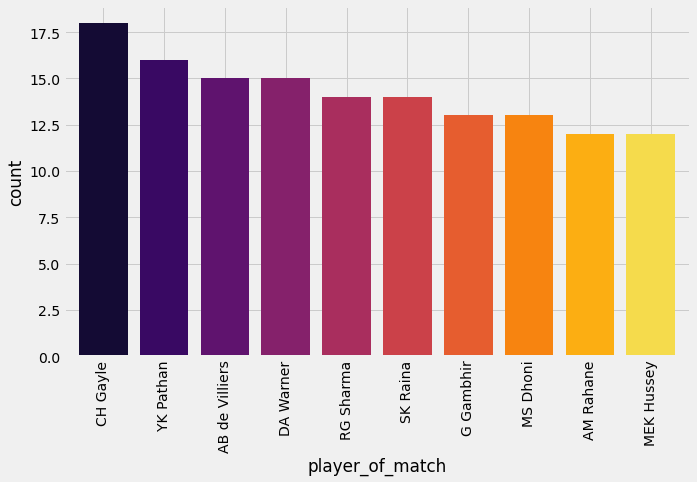

In [40]:
plt.subplots(figsize=(10,6))
ax = df['player_of_match'].value_counts().head(10).plot.bar(width=.8, color=sns.color_palette('inferno',10))  #counts the values corresponding 
# to each batsman and then filters out the top 10 batsman and then plots a bargraph 
ax.set_xlabel('player_of_match') 
ax.set_ylabel('count')
# for p in ax.patches:
#     ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
plt.show()

In [31]:
high_scores=df2.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
high_scores1=high_scores[high_scores['inning']==1]
high_scores2=high_scores[high_scores['inning']==2]
high_scores1=high_scores1.merge(high_scores2[['match_id','inning', 'total_runs']], on='match_id')
high_scores1.rename(columns={'inning_x':'inning_1','inning_y':'inning_2','total_runs_x':'inning1_runs','total_runs_y':'inning2_runs'},inplace=True)
high_scores1=high_scores1[high_scores1['inning1_runs']>=200]
high_scores1['is_score_chased']=1
high_scores1['is_score_chased'] = np.where(high_scores1['inning1_runs']<=high_scores1['inning2_runs'], 
                                           'yes', 'no')
high_scores1.head()

,match_id,inning_1,batting_team,bowling_team,inning1_runs,inning_2,inning2_runs,is_score_chased
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,207,2,172,no
8,9,1,Delhi Daredevils,Rising Pune Supergiant,205,2,108,no
19,20,1,Royal Challengers Bangalore,Gujarat Lions,213,2,192,no
31,32,1,Sunrisers Hyderabad,Kings XI Punjab,207,2,181,no
35,36,1,Sunrisers Hyderabad,Kolkata Knight Riders,209,2,161,no


Chances of chasing 200+ Target

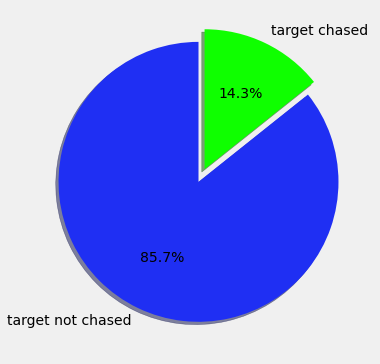

In [40]:
slices=high_scores1['is_score_chased'].value_counts().reset_index().is_score_chased
slices = list(slices)
label=['target not chased','target chased']
plt.pie(slices,labels=labels,colors=['#1f2ff3', '#0fff00'],startangle=90,shadow=True,explode=(0,0.1),autopct='%1.1f%%')
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()

Top 10 Batsmen

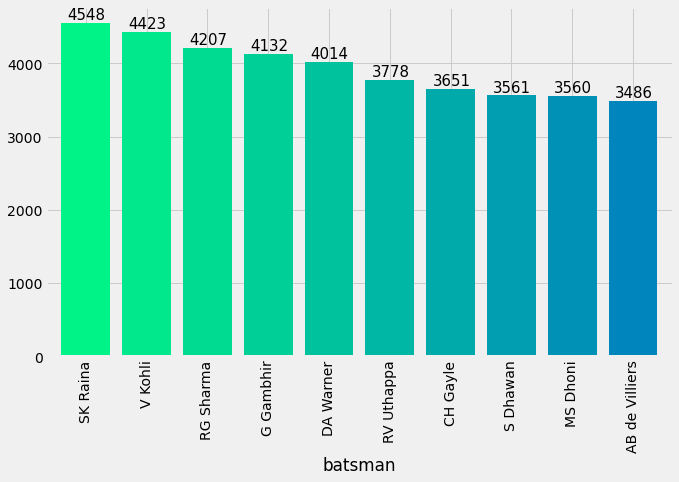

In [39]:
plt.subplots(figsize=(10,6))
max_runs=df2.groupby(['batsman'])['batsman_runs'].sum()
ax=max_runs.sort_values(ascending=False)[:10].plot.bar(width=0.8,color=sns.color_palette('winter_r',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+50),fontsize=15)
plt.show()

In [7]:
max_runs=df2.groupby(['batsman'])['batsman_runs'].sum()
ax=max_runs.sort_values(ascending=False)[:10]
ax = pd.DataFrame(ax)
ax['batsman_runs']

batsman
SK Raina          4548
V Kohli           4423
RG Sharma         4207
G Gambhir         4132
DA Warner         4014
RV Uthappa        3778
CH Gayle          3651
S Dhawan          3561
MS Dhoni          3560
AB de Villiers    3486
Name: batsman_runs, dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [4]:
#Check for Nulls
df.isnull().sum().sort_values(ascending = False)

umpire3            636
city                 7
winner               3
player_of_match      3
umpire2              1
umpire1              1
venue                0
win_by_wickets       0
win_by_runs          0
id                   0
season               0
result               0
toss_decision        0
toss_winner          0
team2                0
team1                0
date                 0
dl_applied           0
dtype: int64

In [5]:
#Fix null for column - umpire3, Drop the column as it does not contain any entry.
df.drop(['umpire3'], inplace = True, axis = 1)

In [6]:
#Fix null for column - city
df[pd.isnull(df['city'])]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus


In [7]:
df['city'] = df['city'].fillna("DUBAI")

In [8]:
df.isnull().sum().sort_values(ascending = False)

player_of_match    3
winner             3
umpire2            1
umpire1            1
dl_applied         0
venue              0
win_by_wickets     0
win_by_runs        0
id                 0
season             0
toss_decision      0
toss_winner        0
team2              0
team1              0
date               0
city               0
result             0
dtype: int64

In [9]:
#Fix null for column - player_of_match
df['player_of_match'] = df['player_of_match'].fillna(df['player_of_match'].mode()[0])

In [10]:
df.isnull().sum().sort_values(ascending = False)

winner             3
umpire2            1
umpire1            1
dl_applied         0
venue              0
player_of_match    0
win_by_wickets     0
win_by_runs        0
id                 0
season             0
toss_decision      0
toss_winner        0
team2              0
team1              0
date               0
city               0
result             0
dtype: int64

In [11]:
df['winner'] = df['winner'].fillna("DRAW")

In [12]:
df['umpire1'] = df['umpire1'].fillna(df['umpire1'].mode()[0])
df['umpire2'] = df['umpire2'].fillna(df['umpire2'].mode()[0])

In [13]:
df.isnull().sum().sort_values(ascending = False)

id                 0
dl_applied         0
umpire1            0
venue              0
player_of_match    0
win_by_wickets     0
win_by_runs        0
winner             0
result             0
season             0
toss_decision      0
toss_winner        0
team2              0
team1              0
date               0
city               0
umpire2            0
dtype: int64

In [14]:
# season, city, team1, team2, toss_winner, toss_decision, winner
df_1 = df.drop(['id', 'date', 'result', 'dl_applied', 'win_by_runs', 'win_by_wickets',
'player_of_match', 'venue',
'umpire1', 'umpire2'], axis = 1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               636 non-null    int64 
 1   season           636 non-null    int64 
 2   city             636 non-null    object
 3   date             636 non-null    object
 4   team1            636 non-null    object
 5   team2            636 non-null    object
 6   toss_winner      636 non-null    object
 7   toss_decision    636 non-null    object
 8   result           636 non-null    object
 9   dl_applied       636 non-null    int64 
 10  winner           636 non-null    object
 11  win_by_runs      636 non-null    int64 
 12  win_by_wickets   636 non-null    int64 
 13  player_of_match  636 non-null    object
 14  venue            636 non-null    object
 15  umpire1          636 non-null    object
 16  umpire2          636 non-null    object
dtypes: int64(5), object(12)
memory usag

In [16]:
#Label Encode city, toss_decision using Label Encoder class
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_1['city'] = le.fit_transform(df_1['city'])
df_1['toss_decision'] = le.fit_transform(df_1['toss_decision'])
df_1.head(5)

,season,city,team1,team2,toss_winner,toss_decision,winner
0,2017,14,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,1,Sunrisers Hyderabad
1,2017,25,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,1,Rising Pune Supergiant
2,2017,27,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,1,Kolkata Knight Riders
3,2017,15,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,1,Kings XI Punjab
4,2017,2,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,0,Royal Challengers Bangalore


In [17]:
df_1.team1.value_counts()

Mumbai Indians                 82
Kings XI Punjab                77
Chennai Super Kings            77
Royal Challengers Bangalore    70
Kolkata Knight Riders          68
Delhi Daredevils               63
Rajasthan Royals               54
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  14
Rising Pune Supergiant          8
Kochi Tuskers Kerala            7
Rising Pune Supergiants         7
Name: team1, dtype: int64

In [18]:
#Label Encode team1, team2, winner, toss_winner, using Mapper
teamMapper={"Mumbai Indians": 0, "Chennai Super Kings": 1, "Kings XI Punjab":2, "Royal Challengers Bangalore" : 3, 
              "Kolkata Knight Riders" : 4,"Delhi Daredevils" : 5,"Rajasthan Royals" : 6,"Sunrisers Hyderabad" : 7,
              "Deccan Chargers" : 8, "Pune Warriors" : 9,"Gujarat Lions" : 10,"Rising Pune Supergiant" : 11, 
              "Kochi Tuskers Kerala": 12,"Rising Pune Supergiants": 13, 'DRAW': 14}
for dataset in [df_1]:
    dataset['team1'] = dataset['team1'].map(teamMapper)

In [19]:
for dataset in [df_1]:
    dataset['team2'] = dataset['team2'].map(teamMapper)
    dataset['toss_winner'] = dataset['toss_winner'].map(teamMapper)
    dataset['winner'] = dataset['winner'].map(teamMapper)

In [20]:
df_1.head()

,season,city,team1,team2,toss_winner,toss_decision,winner
0,2017,14,7,3,3,1,7
1,2017,25,0,11,11,1,11
2,2017,27,10,4,4,1,4
3,2017,15,11,2,2,1,2
4,2017,2,3,5,3,0,3


In [21]:
#X and Y #First Iteration
X = df_1.drop(['winner', 'toss_winner', 'toss_decision'], axis=1)
y = df_1['winner']

#X and Y #Second Iteration
X = df_1.drop(['winner'], axis = 1)
y = df_1['winner']
       
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
#Model Training - Gaussian NB
from sklearn.naive_bayes import GaussianNB
clf_gnb = GaussianNB()
clf_gnb.fit(X_train, y_train)
y_prediction_gnb = clf_gnb.predict(X_test)
accuracy_score_gnb = clf_gnb.score(X_train, y_train)*100
print (accuracy_score_gnb)

32.80898876404494


In [23]:
#Model Training - KNN
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(X_train, y_train)
y_prediction_gnb = clf_knn.predict(X_test)
accuracy_score_knn = clf_knn.score(X_train, y_train)*100
print (accuracy_score_knn)

62.69662921348315


In [24]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)
y_pred_rf = rf_clf.predict(X_test)
accuracy_score_rf = rf_clf.score(X_train,y_train)*100
print(accuracy_score_rf)

99.32584269662922
